# ECE 143: Programming for Data Analysis 

## Petfinder.my Adoption Prediction 
*Predicting the adoptability of pets based on different features*


In [1]:
import pandas as pd
import numpy as np
import zipfile
import os.path
from os import path
import matplotlib.pyplot as plt

In [2]:
# Load the data 

breed_labels = pd.read_csv("../data/breed_labels.csv")
color_labels = pd.read_csv("../data/color_labels.csv")
state_labels = pd.read_csv("../data/state_labels.csv")

# Check if file already exists
if not path.exists('../data/train.csv'):
    train_zip = zipfile.ZipFile('../data/train.zip')
    train_zip.extractall('../data')
    train_zip.close()

train = pd.read_csv("../data/train.csv")


In [3]:
# Initial look at the data

train.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize      ...        Health  Quantity  Fee  State  \
0             1      ...             1         1  100  41326   
1             2      ...             1         1    0  41401   
2             2      ...             1         1    0  41326   
3             2      ...             1         1  150  41401   
4             2      ...             1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [5]:
train.describe()


Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086      0.547959      0.599070   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      2.000000      1.000000   
50%        2.000000      2.000000      0.000000      2.000000      1.000000   
75%        3.000000      6.000000      5.000000      2.000000      2.000000   
max        7.000000      7.000000      7.000000      4.000000      3.000000   

         Vaccinated      Dewormed    Sterilized        Health      Quantity  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.731208      1.558727      1.914227      1.036617      1.576069   
std        0.667649      0.695817      0.566172      0.199535      1.472477   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      1.000000      1.000000   
50%        2.000000      1.000000      2.000000      1.000000      1.000000   
75%        2.000000      2.000000      2.000000      1.000000      1.000000   
max        3.000000      3.000000      3.000000      3.000000     20.000000   

                Fee         State      VideoAmt      PhotoAmt  AdoptionSpeed  
count  14993.000000  14993.000000  14993.000000  14993.000000   14993.000000  
mean      21.259988  41346.028347      0.056760      3.889215       2.516441  
std       78.414548     32.444153      0.346185      3.487810       1.177265  
min        0.000000  41324.000000      0.000000      0.000000       0.000000  
25%        0.000000  41326.000000      0.000000      2.000000       2.000000  
50%        0.000000  41326.000000      0.000000      3.000000       2.000000  
75%        0.000000  41401.000000      0.000000      5.000000       4.000000  
max     3000.000000  41415.000000      8.000000     30.000000       4.000000

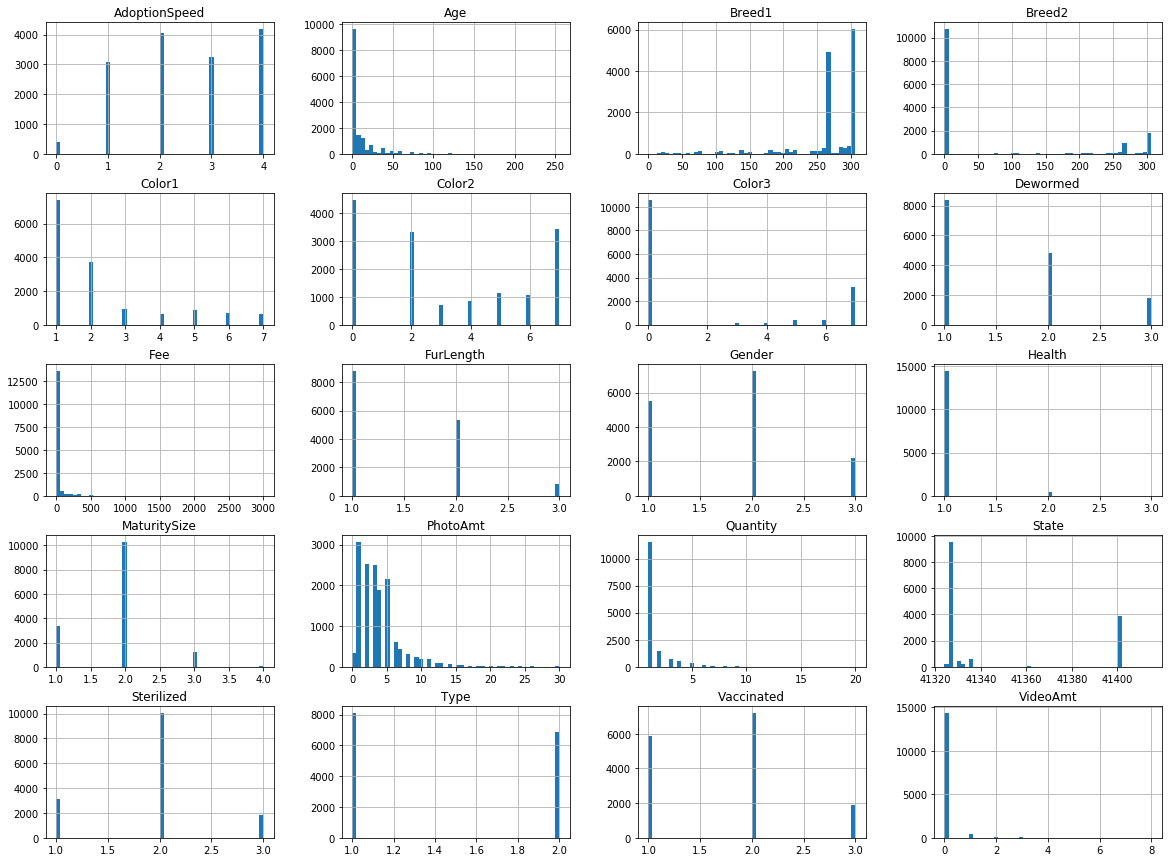

In [6]:
%matplotlib inline 

train.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Creating a copy of data for visualization
train_copy = train.copy()

    StateID        StateName
0     41336            Johor
1     41325            Kedah
2     41367         Kelantan
3     41401     Kuala Lumpur
4     41415           Labuan
5     41324           Melaka
6     41332  Negeri Sembilan
7     41335           Pahang
8     41330            Perak
9     41380           Perlis
10    41327     Pulau Pinang
11    41345            Sabah
12    41342          Sarawak
13    41326         Selangor
14    41361       Terengganu


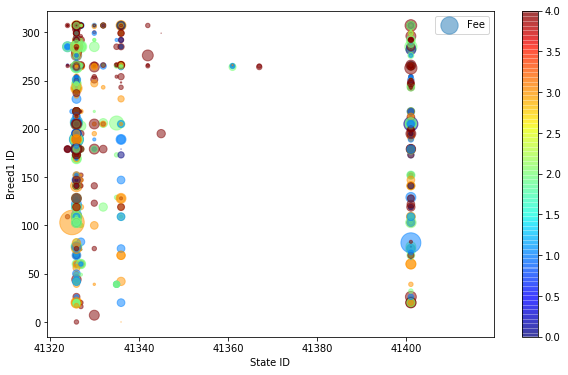

In [8]:
# Data density For each State vs Breed1 
# Area of each point is proportional to Fee
# Color of each point is representative of adoptibility

plt.rcParams['figure.figsize'] = (10,6)

state_dict = dict(zip(state_labels["StateID"], state_labels["StateName"]))

x_axis = [state_dict[i] for i in train_copy["State"]]
x_axis = pd.DataFrame(x_axis)

train_copy["StateName"] = x_axis
print(state_labels)
sc = plt.scatter(train_copy["State"], train_copy["Breed1"], alpha=0.5, 
            s=train_copy["Fee"]/5, label="Fee", c=train_copy["AdoptionSpeed"],
            cmap=plt.get_cmap("jet"))
plt.colorbar(sc)
plt.xlabel("State ID")
plt.ylabel("Breed1 ID")
plt.legend()

## Correlation Between Different Attributes

In [9]:
corr_matrix = train_copy.corr()

In [10]:
corr_matrix["AdoptionSpeed"]

Type            -0.091240
Age              0.100510
Breed1           0.107834
Breed2          -0.018642
Gender           0.057622
Color1          -0.044192
Color2          -0.038579
Color3          -0.007014
MaturitySize     0.045653
FurLength       -0.091337
Vaccinated      -0.059043
Dewormed        -0.013210
Sterilized      -0.083447
Health           0.029382
Quantity         0.062931
Fee             -0.004017
State            0.013119
VideoAmt        -0.000571
PhotoAmt        -0.023233
AdoptionSpeed    1.000000
Name: AdoptionSpeed, dtype: float64

In [11]:
print(color_labels)

   ColorID ColorName
0        1     Black
1        2     Brown
2        3    Golden
3        4    Yellow
4        5     Cream
5        6      Gray
6        7     White


# Breed-ID Analysis

In [12]:

# Correlating top states with HDI 
state_labels['HDI'] = [0.785, 0.769, 0.741, 0.822, 
                       0.742, 0.794, 0.789, 0.766, 
                       0.778, 0.767, 0.803, 0.674, 
                       .707, 0.819, 0.762]

# Idenify Top States
top_states = train_copy['State'].value_counts()
x = []
y = []
bar_color = []
for state in top_states.index:
    x.append(state_dict[state])
    y.append(top_states[state])
    bar_color.append(state_labels.loc[state_labels['StateID'] == state]['HDI'].values[0])
    print(state_dict[state], state_labels.loc[state_labels['StateID'] == state]['HDI'].values[0])

Selangor 0.819
Kuala Lumpur 0.822
Pulau Pinang 0.803
Johor 0.785
Perak 0.778
Negeri Sembilan 0.789
Melaka 0.794
Kedah 0.769
Pahang 0.766
Terengganu 0.762
Sabah 0.674
Kelantan 0.741
Sarawak 0.707
Labuan 0.742


    StateID        StateName    HDI
0     41336            Johor  0.785
1     41325            Kedah  0.769
2     41367         Kelantan  0.741
3     41401     Kuala Lumpur  0.822
4     41415           Labuan  0.742
5     41324           Melaka  0.794
6     41332  Negeri Sembilan  0.789
7     41335           Pahang  0.766
8     41330            Perak  0.778
9     41380           Perlis  0.767
10    41327     Pulau Pinang  0.803
11    41345            Sabah  0.674
12    41342          Sarawak  0.707
13    41326         Selangor  0.819
14    41361       Terengganu  0.762
41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64
0.539193190475


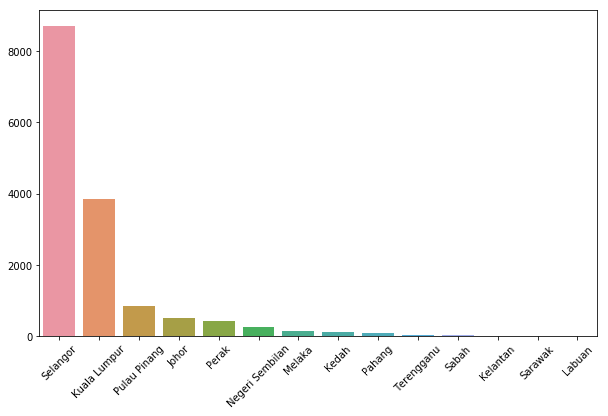

In [13]:
import seaborn as sns
print(state_labels)
print(top_states)

my_plot = sns.barplot(x, y)
for item in my_plot.get_xticklabels():
    item.set_rotation(45)

# Correlation between count and HDI
print(np.corrcoef(y, bar_color)[0,1])

In [14]:
# Combine 
    # Johor 0.785
    # Perak 0.778
    # Negeri Sembilan 0.789
    # Melaka 0.794 as one state

train_copy = train_copy.replace(to_replace = [41336, 41330, 41332], value = 0)

### Tasks
- Split cat and dog
- State-by-State analysis
- Combining states based on location/size (DONE)
- At most 4-5 states (DONE)
- Average adoption speed (DONE)
- Pure breed vs Mixed breed
- Average adoption speeds for top 10 purebreds (don’t by state)


## Average Adoption Speed per State

[2.4520312141381684, 2.5401820546163849, 2.7817319098457887, 2.6499999999999999]


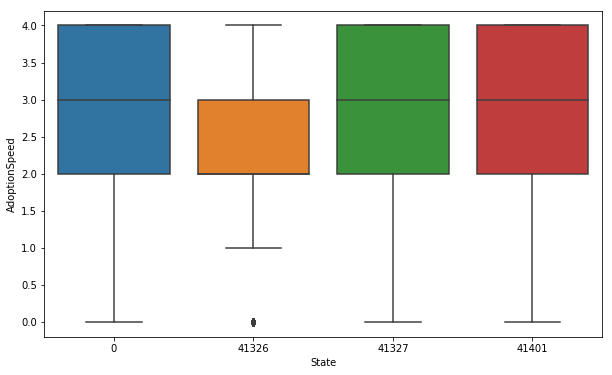

In [69]:
top_state_ID = [41326, 41401, 41327, 0]
top_states_name = ['Selangor', 'Kuala Lumpur', 'Pulau Pinang', 'Combined_state']
average_adoption_speed = []

train_copy= train_copy.drop(train_copy[(train_copy['State'] != 41326) & (train_copy['State'] != 41401)
                          & (train_copy['State'] != 41327)& (train_copy['State'] != 0)].index)

sns.boxplot(x = train_copy['State'], y=train_copy["AdoptionSpeed"] )

for i in range(len(top_state_ID)):
    average_adoption_speed.append(train_copy.loc[train_copy['State'] == top_state_ID[i]]['AdoptionSpeed'].mean(0))


print(average_adoption_speed)
